In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import top_block
reload(top_block)
from import_me import *
import time
import os

In [85]:
red_dot_shape = (256, 256)
pinguim_shape = (400, 600) # prefixo 66, 77 existe na imagem do pinguim, dentro da função generate_lst_rcvs
# tem um tratamento expecífico pra essa imagem, tem que botar um prefixo maior

In [3]:
# fig, axs = plt.subplots(2, 5)
# axs.shape

In [81]:
def generate_lst_rcvs(img_path, img_shape, pinguim):
    lst_r = []
    for x in np.arange(0, 1, 0.1):
        print(x)
        fg = top_block.top_block(channel_noise = x, img_path = img_path)
        fg.run()
        rcv = np.array(fg.sink.data(), dtype = np.uint8)
        if pinguim:
            rcv = np.roll(np.packbits(np.roll(np.unpackbits(rcv), 6)), -648114)
        lst_r.append(np.flipud(rcv_ready(rcv, img_shape)))
    return np.array(lst_r)

def plot_lst_r(lst_r):
    fig, axs = plt.subplots(2, 5, figsize = (16, 8))
    [ax.set_axis_off() for ax in axs.ravel()]

    for i in range(axs.shape[0]):
        for j in range(axs.shape[1]):
            #print(i, j)
            ind_1d = i*axs.shape[1]+j
            axs[i][j].set_title("Noise: {:.2f}".format(float(float(ind_1d)/(axs.shape[0] * axs.shape[1]))))
            axs[i][j].imshow(lst_r[ind_1d])
    return

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
CPU times: user 1min 16s, sys: 5.16 s, total: 1min 21s
Wall time: 24.7 s


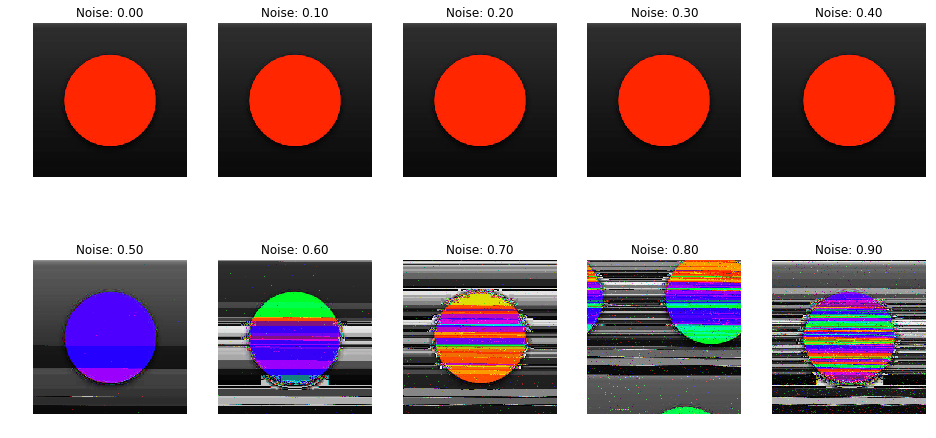

In [83]:
%%time
plot_lst_r(generate_lst_rcvs("red_dot.bmp", red_dot_shape, 0))

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
CPU times: user 5min 22s, sys: 21.4 s, total: 5min 43s
Wall time: 1min 40s


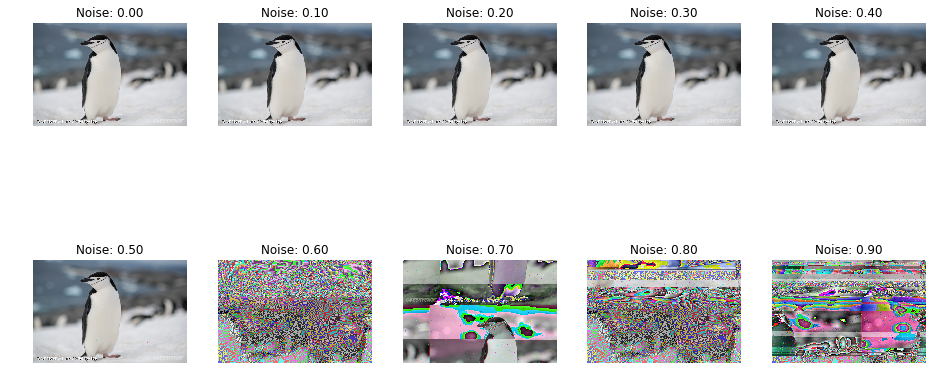

In [84]:
%%time
plot_lst_r(generate_lst_rcvs("orig_pinguim.bmp", pinguim_shape, 1))

In [9]:
######

In [71]:
fg = top_block.top_block(channel_noise = 0.6, img_path = "orig_pinguim.bmp")

In [72]:
fg.run()

In [73]:
rcv = np.array(fg.sink.data(), dtype = np.uint8)

In [13]:
search_sequence_numpy(np.packbits(np.roll(np.unpackbits(rcv), 6)), np.array([66, 77]))

array([ 244481,  244482,  648114,  648115,  692005,  692006,  964603,
        964604, 1368236, 1368237, 1412127, 1412128])

In [74]:
rcv = np.roll(np.packbits(np.roll(np.unpackbits(rcv), 6)), -648114)

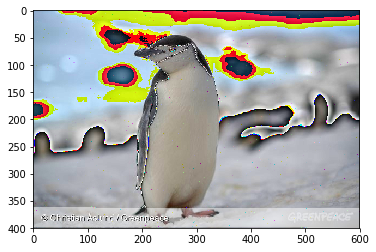

In [75]:
plt.imshow(np.flipud(rcv_ready(rcv, pinguim_shape)))